In [83]:
fr.load('../data/flow_reconstruction_60_shallow_multi.pickle')

In [84]:
# mach_rec = fr.hf_data_handler.get_variable('Mach',hf_reconstructed[:,2:3])

mesh = pv.read(
    '/home/ppiper/Dropbox/local/ihtc_repository/data/doe_60/60/SU2/outputs/cht_setupSU2.vtm')


In [85]:
def plot_heat_flux():
    Heat_Flux_rec = fr.hf_data_handler.get_variable(
        'Heat_Flux_UPPER_WALL', hf_reconstructed[:, 5:6])
    idx = 0
    end_idx = -1
    plt.figure(figsize=(3, 3))
    plt.plot(
        np.linspace(0, 1, Heat_Flux_rec.size)[idx:end_idx],
        mesh['Zone 0 (Comp. Fluid)']['Boundary']['UPPER_WALL']['Heat_Flux'][idx:end_idx]/1e3,
        label=r'$CFD$', color='k')
    plt.plot(np.linspace(0, 1, Heat_Flux_rec.size)[idx:end_idx],
             Heat_Flux_rec[idx:end_idx]/1e3, label=r'$ROM$', alpha=0.5, ls='--')
    plt.ylabel(r'$Wall\; Heat Flux\; [KW/m^2]$')
    plt.xlabel(r'$x/L$')
    plt.legend()
    plt.tight_layout()
    plt.savefig('./figures/predicted_wall_heat_flux.pdf')
    plt.show()


#plot_heat_flux()


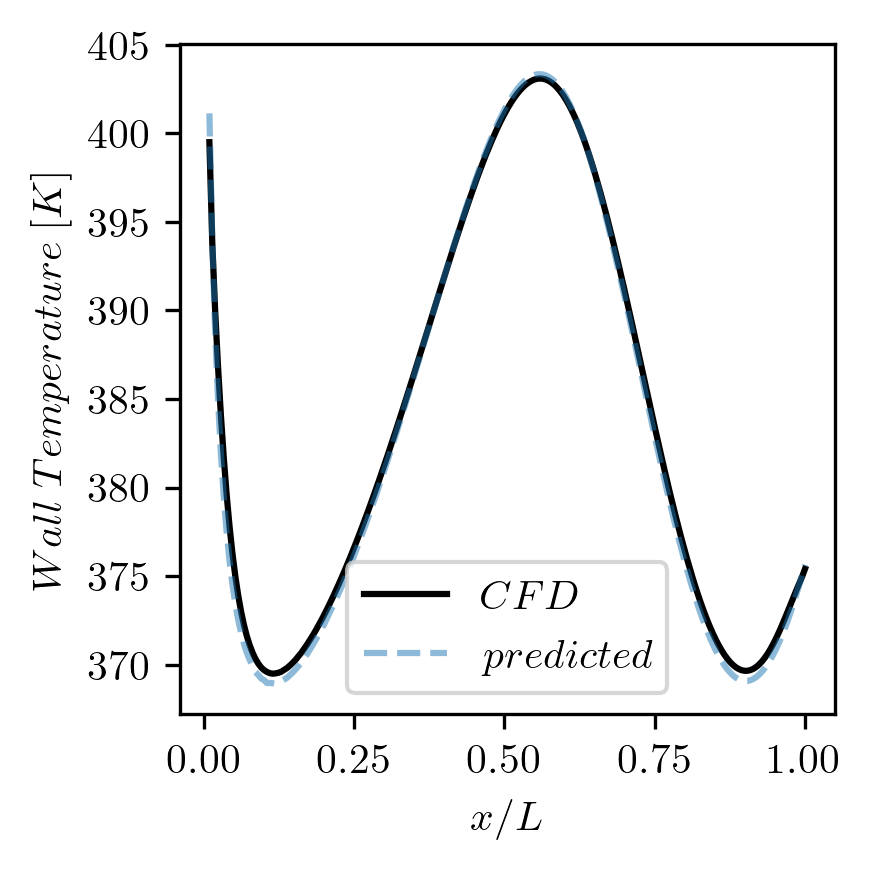

In [25]:
def plot_temperature_solid():
    T_solid_rec = fr.hf_data_handler.get_variable(variable='Temperature_Solid_INNERWALL',data=hf_reconstructed[:,5:6])

    idx=2
    plt.figure(figsize=(3,3))
    plt.plot(np.linspace(0,1,T_solid_rec.size)[idx:],mesh['Zone 1 (Solid Heat)']['Boundary']['INNERWALL']['Temperature'][idx:], label=r'$CFD$', color='k')
    plt.plot(np.linspace(0,1,T_solid_rec.size)[idx:],T_solid_rec[idx:], label=r'$predicted$', alpha=0.5, ls='--')
    plt.ylabel(r'$Wall\; Temperature\; [K]$')
    plt.xlabel(r'$x/L$')
    plt.legend()
    plt.tight_layout()
    plt.savefig('./figures/predicted_wall_temperature.pdf')
    plt.show()

plot_temperature_solid()

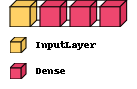

In [26]:
import visualkeras

visualkeras.layered_view(fr.surrogate.nn, legend=True)


In [42]:
def AE(x, y):
    # Absolute Error
    return (abs(x-y))

def NAE(x, y):
    # Normalized Absolute Error
    return AE(x,y)/(np.max(x)-np.min(x))

def NAEP(x, y):
    # Normalized Absolute Error Percentage
    return NAE(x,y)*100

def MeanAE(x, y):
    # Mean Absolute Error
    return np.mean(abs(x-y))


def MAE(x, y):
    # Maximum Absolute Error
    return np.max(abs(x-y))


def MAEP(x, y):
    # Maximum Absolute Error
    return MAE(x, y)*100


def NMAE(x, y):
    # Normalized Maximum Absolute Error
    return np.max(abs(x-y))/(np.max(x)-np.min(x))


def NMAEP(x, y):
    # Normalized Maximum Absolute Error Percentage
    return NMAE(x, y)*100


def MSE(x, y):
    # Mean Squared Error
    return np.mean((x-y)**2)

# colocar


def RMSE(x, y):
    # Root Mean Squared Error
    return np.sqrt(np.mean((x-y)**2))


def NRMSE(x, y):
    # Normalized Root Mean Squared Error
    # return np.sqrt(np.mean((x-y)**2))/np.mean(x)
    return np.sqrt(np.mean((x-y)**2))/(np.max(x)-np.min(x))


def NRMSEP(x, y):
    # Normalized Root Mean Squared Error
    # return np.sqrt(np.mean((x-y)**2))/np.mean(x)
    return NRMSE(x, y)*100


def MAPE(x, y):
    # Mean Absolute Percentage Error
    return np.mean(abs((x-y)/x))

# coloxae


def R2(x, y):
    # Coefficient of Determination
    return 1 - np.sum((x-y)**2)/np.sum((x-np.mean(y))**2)


def RSE(x, y):
    # Relative Squared Error
    return np.sum((x-y)**2) / np.sum((x - np.mean(x))**2)


def RAE(x, y):
    # Relative Squared Error
    return np.sum((x-y)**2) / np.sum((x - np.mean(y))**2)

# maximum absolute error


In [67]:
def plot_reconstruction_var(mesh, var, hf_reconstructed, block=None, metric='AE', clim=None, metric_clim=None, legend_args=None, scale_variable=1, units='', metric_units=''):
    hf_reconstructed = hf_reconstructed[:, None]

    pv.set_plot_theme("document")
    pv.global_theme.auto_close = True
    pl = pv.Plotter()
    pl.enable_anti_aliasing('ssaa')

    fluid = mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']
    fluid_var = np.copy(fluid[var])
    fluid[f'{var} {units}'] = fluid_var*scale_variable
    fluid.set_active_scalars(f'{var} {units}')
    if var == 'Temperature':
        solid = mesh['Zone 1 (Solid Heat)']['Internal']['Internal']
        solid_var = np.copy(solid[var])
        solid[f'{var} {units}'] = solid_var*scale_variable
        solid.set_active_scalars(f'{var} {units}')
        pl.add_mesh(solid, clim=clim, scalar_bar_args=legend_args)
    pl.add_mesh(fluid, clim=clim, scalar_bar_args=legend_args)
    pl.camera.tight()
    pl.show(
        screenshot=f'/home/ppiper/Dropbox/local/ihtc_repository/data/doe_60/figures/{var}_field_cfd.png')

    pv.set_plot_theme("document")
    pv.global_theme.auto_close = True
    pl = pv.Plotter()
    pl.enable_anti_aliasing('ssaa')

    fluid_rec = fr.hf_data_handler.get_variable(var, hf_reconstructed)[:, 0]
    fluid[f'{var} {units} - ROM'] = fluid_rec*scale_variable

    if var == 'Temperature':
        solid = mesh['Zone 1 (Solid Heat)']['Internal']['Internal']
        solid_rec = fr.hf_data_handler.get_variable(
            f'{var}_Solid', hf_reconstructed)[:, 0]
        solid[f'{var} {units} - ROM'] = solid_rec*scale_variable
        solid.set_active_scalars(f'{var} {units} - ROM')
        pl.add_mesh(solid, clim=clim, scalar_bar_args=legend_args)

    fluid.set_active_scalars(f'{var} {units} - ROM')
    pl.add_mesh(fluid, clim=clim, scalar_bar_args=legend_args)
    pl.camera.tight()
    pl.show(
        screenshot=f'/home/ppiper/Dropbox/local/ihtc_repository/data/doe_60/figures/{var}_field_reconstructed.png')

    pv.set_plot_theme("document")
    pv.global_theme.auto_close = True
    pl = pv.Plotter()
    pl.enable_anti_aliasing('ssaa')

    AE_fluid = eval(metric)(fluid_var, fluid_rec)
    print(AE_fluid)
    fluid[f'{metric} {metric_units}'] = AE_fluid

    if var == 'Temperature':
        solid = mesh['Zone 1 (Solid Heat)']['Internal']['Internal']
        AE_solid = eval(metric)(solid_var, solid_rec)
        solid[f'{metric} {metric_units}'] = AE_solid
        solid.set_active_scalars(f'{metric} {metric_units}')
        pl.add_mesh(solid, clim=metric_clim, scalar_bar_args=legend_args)

    fluid.set_active_scalars(f'{metric} {metric_units}')
    pl.add_mesh(fluid, clim=metric_clim, scalar_bar_args=legend_args)
    pl.camera.tight()
    pl.show(
        screenshot=f'/home/ppiper/Dropbox/local/ihtc_repository/data/doe_60/figures/{var}_field_error.png')


In [ ]:
mesh = pv.read('/home/ppiper/Dropbox/local/ihtc_repository/data/doe_60/60/SU2/outputs/cht_setupSU2.vtm')

legend_args = dict(
    title_font_size=45,
    label_font_size=35,
    shadow=True,
    n_labels=3,
    italic=False,
    fmt="%.2f",
    font_family="times",
    #height=0.25,
    width= 0.45,
    vertical=False, 
    position_x=0.45, 
    position_y=0.05
)

plot_reconstruction_var(
    mesh, 'Temperature', 
    hf_reconstructed[:,5], 
    metric='NAE', 
    metric_clim=[0, 1], 
    clim=[300, 631], 
    legend_args=legend_args, 
    units='[K]', 
    metric_units=''
)

plot_reconstruction_var(
    mesh, 'Pressure', 
    hf_reconstructed[:,5], 
    metric='NAE', 
    metric_clim=[0, 1], 
    clim=[0, 790],  
    legend_args=legend_args, 
    units='[kPa]', 
    metric_units='', 
    scale_variable=1e-3
)

plot_reconstruction_var(
    mesh, 'Mach', 
    hf_reconstructed[:,5], 
    metric='NAE', 
    metric_clim=[0, 1], 
    clim=[0, 1.84],  
    legend_args=legend_args, 
    metric_units=''
)

In [27]:
error = {}
error['MAE'] = {}
error['NMAE'] = {}
error['NMAEP'] = {}
error['NRMSEP'] = {}
error['MSE'] = {}
error['RMSE'] = {}
error['NRMSE'] = {}
error['MAPE'] = {}
error['R2'] = {}
error['RSE'] = {}
error['RAE'] = {}
plot = False

for var in fr.hf_variables_dict:

    reconstructed = fr.hf_data_handler.get_variable(
        variable=var, data=hf_reconstructed)

    original = fr.hf_data_handler.get_variable(
        variable=var, data=fr.hf_data_handler.test)

    # error[var] = np.linalg.norm(abs(reconstructed-original)/original, axis=0)

    error['MAE'][var] = MAE(original, reconstructed)
    error['NMAE'][var] = NMAE(original, reconstructed)
    error['MSE'][var] = MSE(original, reconstructed)
    error['NRMSE'][var] = NRMSE(original, reconstructed)
    error['NMAEP'][var] = NMAEP(original, reconstructed)
    error['NRMSEP'][var] = NRMSEP(original, reconstructed)
    error['RMSE'][var] = RMSE(original, reconstructed)
    error['MAPE'][var] = MAPE(original, reconstructed)
    error['R2'][var] = R2(original, reconstructed)
    error['RSE'][var] = RSE(original, reconstructed)
    error['RAE'][var] = RAE(original, reconstructed)

    b, a = np.polyfit(original.flatten(), reconstructed.flatten(), deg=1)

    # Create sequence of 100 numbers from 0 to 100
    xseq = np.linspace(original.flatten().min(),
                       original.flatten().max(), num=100)

    if plot:
        # Plot regression line
        plt.figure(figsize=(3, 3))
        plt.plot(xseq, a + b * xseq, color="k",
                 label=f"R2={error['R2'][var]:.4f}")
        plt.scatter(original.flatten(), reconstructed.flatten(), alpha=0.5)
        plt.xlabel(var)
        plt.ylabel(f'predicted {var}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'./figures/results/{var}.png')
        plt.show()


/tmp/ipykernel_363057/3330265004.py:57: RuntimeWarning: invalid value encountered in divide
  return np.mean(abs((x-y)/x))


In [28]:
def sub_dict(d, keys): return dict((key, d[key]) for key in keys)


d = dict(sub_dict(error, ['NMAEP', 'NRMSEP', 'R2']))

df = pd.DataFrame.from_dict(d)
df.style.format(precision=4)


,NMAEP,NRMSEP,R2
Pressure,0.2605,0.0252,1.0000
Temperature,1.8519,0.0792,1.0000
Mach,1.9024,0.0350,1.0000
Temperature_Solid,2.5759,0.4187,0.9996
Temperature_Solid_INNERWALL,2.8484,0.7688,0.9993
Heat_Flux_UPPER_WALL,1.2659,0.2124,0.9996


In [29]:
error['NRMSE']


{'Pressure': 0.0002519630865453706,
 'Temperature': 0.0007922912738606095,
 'Mach': 0.00034951784414065764,
 'Temperature_Solid': 0.004187380951962963,
 'Temperature_Solid_INNERWALL': 0.007688329966387744,
 'Heat_Flux_UPPER_WALL': 0.0021238119600392154}

In [30]:
error['NMAE']


{'Pressure': 0.0026046322215120656,
 'Temperature': 0.01851860672885158,
 'Mach': 0.019023644059215812,
 'Temperature_Solid': 0.025759273977914696,
 'Temperature_Solid_INNERWALL': 0.028483612708653273,
 'Heat_Flux_UPPER_WALL': 0.012658943608041312}

In [31]:
error['R2']


{'Pressure': 0.9999994863141178,
 'Temperature': 0.9999907914319067,
 'Mach': 0.9999982322840132,
 'Temperature_Solid': 0.9996061716179588,
 'Temperature_Solid_INNERWALL': 0.9992586759447294,
 'Heat_Flux_UPPER_WALL': 0.9995525036818058}

In [32]:
# def projection_error():

# lf_train_reconstruction error
lf_projected = fr.lf_rom.reduce(fr.lf_data_handler.train)
lf_reconstructed = fr.lf_rom.reconstruct(lf_projected)
lf_original = fr.lf_data_handler.train
lf_train_reconstruction_error = NRMSE(lf_reconstructed, lf_original)

# hf_train_reconstruction error
hf_projected = fr.hf_rom.reduce(fr.hf_data_handler.train)
hf_reconstructed = fr.hf_rom.reconstruct(hf_projected)
hf_original = fr.hf_data_handler.train
hf_train_reconstruction_error = NRMSE(hf_reconstructed, hf_original)


In [33]:
# lf_train_reconstruction error
lf_projected = fr.lf_rom.reduce(fr.lf_data_handler.validation)
lf_reconstructed = fr.lf_rom.reconstruct(lf_projected)
lf_original = fr.lf_data_handler.validation
lf_validation_reconstruction_error = NRMSE(lf_reconstructed, lf_original)

# hf_train_reconstruction error
hf_projected = fr.hf_rom.reduce(fr.hf_data_handler.validation)
hf_reconstructed = fr.hf_rom.reconstruct(hf_projected)
hf_original = fr.hf_data_handler.validation
hf_validation_reconstruction_error = NRMSE(hf_reconstructed, hf_original)


In [34]:
# lf_train_reconstruction error
lf_projected = fr.lf_rom.reduce(fr.lf_data_handler.test)
lf_reconstructed = fr.lf_rom.reconstruct(lf_projected)
lf_original = fr.lf_data_handler.test
lf_test_reconstruction_error = NRMSE(lf_reconstructed,lf_original)

# hf_train_reconstruction error
hf_projected = fr.hf_rom.reduce(fr.hf_data_handler.test)
hf_reconstructed = fr.hf_rom.reconstruct(hf_projected)
hf_original = fr.hf_data_handler.test
hf_test_reconstruction_error = NRMSE(hf_reconstructed,hf_original)

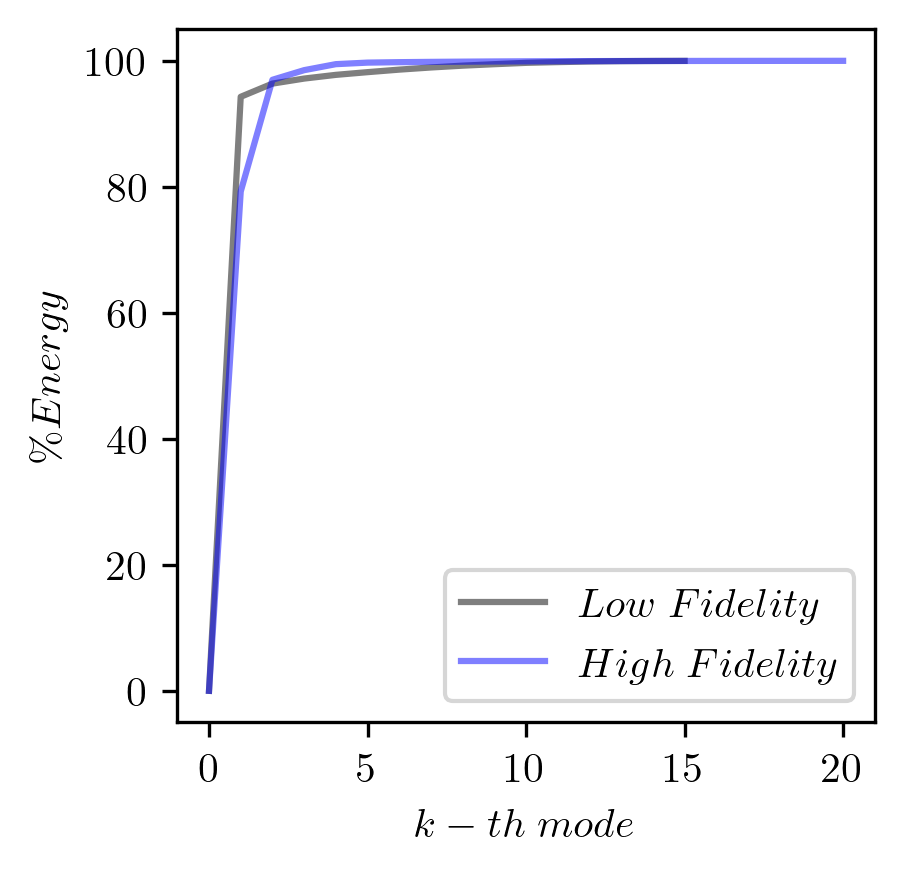

<Figure size 1920x1440 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize=(3, 3))

lf_svd_energy = np.loadtxt('./figures/lf_svd_energy.txt',  delimiter=',')
hf_svd_energy = np.loadtxt('./figures/hf_svd_energy.txr',   delimiter=',')


ax.plot(lf_svd_energy, label=r"$Low\; Fidelity$", c='k', alpha=0.5)
ax.plot(hf_svd_energy, label=r"$High\; Fidelity$", c='blue', alpha=0.5)
plt.xlabel(r"$k-th\; mode$")
plt.ylabel(r"$\% Energy$")

plt.legend()
plt.show()
plt.savefig('./figures/svd_energy.pdf')


In [36]:
!pip install keras-visualizer


In [37]:
from keras_visualizer import visualizer

visualizer(model=fr.surrogate.nn, file_name='./figures/nn.pdf',
           file_format='pdf', view=True)


In [38]:
from keras.utils.vis_utils import plot_model
plot_model(fr.surrogate.nn, to_file='./figures/keras.pdf',
           show_shapes=True, show_layer_names=True)


In [39]:
90*60/10.6


509.433962264151

In [40]:
Sure, here are some relevant references for SVD, POD, flow reconstruction, and neural networks in the context of fluid dynamics:

- Golub, G. H., and C. F. Van Loan. Matrix Computations. 4th ed., Johns Hopkins University Press, 2013. (Reference for SVD)

- Lumley, J. L. "The Structure of Inhomogeneous Turbulent Flows." Atmospheric Turbulence and Radio Wave Propagation, edited by J. L. Lumley, vol. 2, Springer-Verlag, 1967, pp. 166-178. (Reference for POD)

- Iliescu, T., and J. M. Nordbotten. "Reduced-Order Modeling of Flow Problems." Annual Review of Fluid Mechanics, vol. 52, no. 1, 2020, pp. 455-484. (Reference for flow reconstruction)

- Liao, W., et al. "Reduced-Order Modeling of Turbulent Flow in a Combustion Chamber with Deep Neural Networks." Combustion Theory and Modelling, vol. 24, no. 4, 2020, pp. 632-652. (Reference for neural networks in fluid dynamics)

- Brunton, S. L., and J. N. Kutz. Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control. Cambridge University Press, 2019. (Reference for neural networks in general)


SyntaxError: invalid decimal literal (3072652521.py, line 3)


(evince:369964): IBUS-WARNING **: 08:19:30.564: The owner of /home/ppiper/.config/ibus/bus is not ppiper!
